In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Load the Three CSV files

flight_data=pd.read_csv('flights.csv')
hotel_data=pd.read_csv('hotels.csv')
users_data=pd.read_csv('users.csv')

In [3]:
# Merge hotel and flight data on "TravelCode"

df_hotel_flight=pd.merge(flight_data,hotel_data,on='travelCode')

In [6]:
df_hotel_flight.head()

,travelCode,userCode_x,from,to,flightType,price_x,time,distance,agency,date_x,userCode_y,name,place,days,price_y,total,date_y
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,09/26/2019,0,Hotel A,Florianopolis (SC),4,313.02,1252.08,09/26/2019
1,0,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,09/30/2019,0,Hotel A,Florianopolis (SC),4,313.02,1252.08,09/26/2019
2,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,10/10/2019,0,Hotel K,Salvador (BH),2,263.41,526.82,10/10/2019
3,2,0,Salvador (BH),Aracaju (SE),firstClass,1531.92,2.16,830.86,CloudFy,10/12/2019,0,Hotel K,Salvador (BH),2,263.41,526.82,10/10/2019
4,7,0,Aracaju (SE),Salvador (BH),economic,964.83,2.16,830.86,CloudFy,11/14/2019,0,Hotel K,Salvador (BH),3,263.41,790.23,11/14/2019


In [7]:
# Changing the 'userCode_x' name to 'userCode' and deleting the 'userCode_y' because the userCode_x and userCode_y both are same

df_hotel_flight = df_hotel_flight.rename(columns={'userCode_x': 'userCode'})
df_hotel_flight.drop(columns='userCode_y', inplace=True)
df_hotel_flight.head()

,travelCode,userCode,from,to,flightType,price_x,time,distance,agency,date_x,name,place,days,price_y,total,date_y
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,09/26/2019,Hotel A,Florianopolis (SC),4,313.02,1252.08,09/26/2019
1,0,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,09/30/2019,Hotel A,Florianopolis (SC),4,313.02,1252.08,09/26/2019
2,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,10/10/2019,Hotel K,Salvador (BH),2,263.41,526.82,10/10/2019
3,2,0,Salvador (BH),Aracaju (SE),firstClass,1531.92,2.16,830.86,CloudFy,10/12/2019,Hotel K,Salvador (BH),2,263.41,526.82,10/10/2019
4,7,0,Aracaju (SE),Salvador (BH),economic,964.83,2.16,830.86,CloudFy,11/14/2019,Hotel K,Salvador (BH),3,263.41,790.23,11/14/2019


In [8]:
# final merging the user data to the hotel and flight dataframe

df_final=pd.merge(users_data,df_hotel_flight,on='userCode')
df_final.head()

,userCode,company,name_x,gender,age,travelCode,from,to,flightType,price_x,time,distance,agency,date_x,name_y,place,days,price_y,total,date_y
0,0,4You,Roy Braun,male,21,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,09/26/2019,Hotel A,Florianopolis (SC),4,313.02,1252.08,09/26/2019
1,0,4You,Roy Braun,male,21,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,09/30/2019,Hotel A,Florianopolis (SC),4,313.02,1252.08,09/26/2019
2,0,4You,Roy Braun,male,21,2,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,10/10/2019,Hotel K,Salvador (BH),2,263.41,526.82,10/10/2019
3,0,4You,Roy Braun,male,21,2,Salvador (BH),Aracaju (SE),firstClass,1531.92,2.16,830.86,CloudFy,10/12/2019,Hotel K,Salvador (BH),2,263.41,526.82,10/10/2019
4,0,4You,Roy Braun,male,21,7,Aracaju (SE),Salvador (BH),economic,964.83,2.16,830.86,CloudFy,11/14/2019,Hotel K,Salvador (BH),3,263.41,790.23,11/14/2019


In [9]:
# making some changes in Columns name like name_x is UserName and name_y is HotelNmae

df_final = df_final.rename(columns={'name_x': 'userName', 'price_x': 'flightPrice', 'date_x': 'flightDate', 'name_y': 'hotelName', 'price_y': 'hotelPrice', 'date_y': 'hotelDate','time':'flightTime','distance':'flightDistance','agency':'flightAgency','total':'hotelTotal','place':'hotelPlace'})

In [10]:
df_final.head()

,userCode,company,userName,gender,age,travelCode,from,to,flightType,flightPrice,flightTime,flightDistance,flightAgency,flightDate,hotelName,hotelPlace,days,hotelPrice,hotelTotal,hotelDate
0,0,4You,Roy Braun,male,21,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,09/26/2019,Hotel A,Florianopolis (SC),4,313.02,1252.08,09/26/2019
1,0,4You,Roy Braun,male,21,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,09/30/2019,Hotel A,Florianopolis (SC),4,313.02,1252.08,09/26/2019
2,0,4You,Roy Braun,male,21,2,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,10/10/2019,Hotel K,Salvador (BH),2,263.41,526.82,10/10/2019
3,0,4You,Roy Braun,male,21,2,Salvador (BH),Aracaju (SE),firstClass,1531.92,2.16,830.86,CloudFy,10/12/2019,Hotel K,Salvador (BH),2,263.41,526.82,10/10/2019
4,0,4You,Roy Braun,male,21,7,Aracaju (SE),Salvador (BH),economic,964.83,2.16,830.86,CloudFy,11/14/2019,Hotel K,Salvador (BH),3,263.41,790.23,11/14/2019


In [11]:
df_final.shape

(81104, 20)

## EDA

In [12]:
## finding some mathemetical information into this

df_final.describe()

,userCode,age,travelCode,flightPrice,flightTime,flightDistance,days,hotelPrice,hotelTotal
count,81104.000000,81104.000000,81104.000000,81104.000000,81104.000000,81104.000000,81104.000000,81104.000000,81104.000000
mean,666.963726,42.790615,67911.794461,957.725281,1.424116,548.097771,2.499679,214.439554,536.229513
std,391.134383,12.942576,39407.956381,362.212893,0.543071,209.053667,1.119319,76.741832,319.329514
min,0.000000,21.000000,0.000000,301.510000,0.440000,168.220000,1.000000,60.390000,60.390000
25%,323.000000,32.000000,33696.750000,672.660000,1.040000,401.660000,1.000000,165.990000,247.620000
50%,658.000000,42.000000,67831.000000,899.600000,1.460000,562.140000,2.000000,242.880000,495.240000
75%,1013.000000,54.000000,102211.250000,1222.240000,1.760000,676.530000,4.000000,263.410000,742.860000
max,1339.000000,65.000000,135942.000000,1754.170000,2.440000,937.770000,4.000000,313.020000,1252.080000


In [13]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81104 entries, 0 to 81103
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   userCode        81104 non-null  int64  
 1   company         81104 non-null  object 
 2   userName        81104 non-null  object 
 3   gender          81104 non-null  object 
 4   age             81104 non-null  int64  
 5   travelCode      81104 non-null  int64  
 6   from            81104 non-null  object 
 7   to              81104 non-null  object 
 8   flightType      81104 non-null  object 
 9   flightPrice     81104 non-null  float64
 10  flightTime      81104 non-null  float64
 11  flightDistance  81104 non-null  float64
 12  flightAgency    81104 non-null  object 
 13  flightDate      81104 non-null  object 
 14  hotelName       81104 non-null  object 
 15  hotelPlace      81104 non-null  object 
 16  days            81104 non-null  int64  
 17  hotelPrice      81104 non-null 

In [14]:
## drop the dublicate values

df_final=df_final.drop_duplicates()      
df_final.shape                                        ## the data set did't have any dublicate values because the previous rows value and after rows value are same

(81104, 20)

## Geting some more information regarding data

In [15]:
df_final.head()

,userCode,company,userName,gender,age,travelCode,from,to,flightType,flightPrice,flightTime,flightDistance,flightAgency,flightDate,hotelName,hotelPlace,days,hotelPrice,hotelTotal,hotelDate
0,0,4You,Roy Braun,male,21,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,09/26/2019,Hotel A,Florianopolis (SC),4,313.02,1252.08,09/26/2019
1,0,4You,Roy Braun,male,21,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,09/30/2019,Hotel A,Florianopolis (SC),4,313.02,1252.08,09/26/2019
2,0,4You,Roy Braun,male,21,2,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,10/10/2019,Hotel K,Salvador (BH),2,263.41,526.82,10/10/2019
3,0,4You,Roy Braun,male,21,2,Salvador (BH),Aracaju (SE),firstClass,1531.92,2.16,830.86,CloudFy,10/12/2019,Hotel K,Salvador (BH),2,263.41,526.82,10/10/2019
4,0,4You,Roy Braun,male,21,7,Aracaju (SE),Salvador (BH),economic,964.83,2.16,830.86,CloudFy,11/14/2019,Hotel K,Salvador (BH),3,263.41,790.23,11/14/2019


In [16]:
df_final['company'].unique() ## These are the only used by user for traveling

array(['4You', 'Monsters CYA', 'Wonka Company', 'Acme Factory',
       'Umbrella LTDA'], dtype=object)

In [17]:
df_final['age'].unique()     ## These are the age group of people

array([21, 37, 48, 23, 44, 47, 46, 41, 35, 36, 61, 53, 56, 25, 65, 22, 51,
       60, 64, 49, 62, 59, 40, 34, 27, 42, 24, 54, 28, 55, 39, 38, 32, 29,
       52, 57, 31, 45, 30, 43, 58, 63, 50, 26, 33], dtype=int64)

In [18]:
df_final['from'].unique()

array(['Recife (PE)', 'Florianopolis (SC)', 'Aracaju (SE)',
       'Salvador (BH)', 'Brasilia (DF)', 'Natal (RN)', 'Sao Paulo (SP)',
       'Campo Grande (MS)', 'Rio de Janeiro (RJ)'], dtype=object)

In [19]:
df_final['to'].unique()

array(['Florianopolis (SC)', 'Recife (PE)', 'Salvador (BH)',
       'Aracaju (SE)', 'Brasilia (DF)', 'Natal (RN)', 'Sao Paulo (SP)',
       'Campo Grande (MS)', 'Rio de Janeiro (RJ)'], dtype=object)

In [20]:
df_final['flightType'].unique()

array(['firstClass', 'economic', 'premium'], dtype=object)

In [21]:
df_final['flightAgency'].unique()

array(['FlyingDrops', 'CloudFy', 'Rainbow'], dtype=object)

## Visualization

### Gender vs. Average Flight Price

In [22]:
## first df_final.groupby('gender') line of code will make a group by each gender
## then ['flightPrice'] after split into groups, this part of the code selects the ‘flightPrice’ column from each group
## then at the last .mean() function making mean value of each column

average_price = df_final.groupby('gender')['flightPrice'].mean()
average_price

gender
female    953.761477
male      963.001371
none      956.413901
Name: flightPrice, dtype: float64

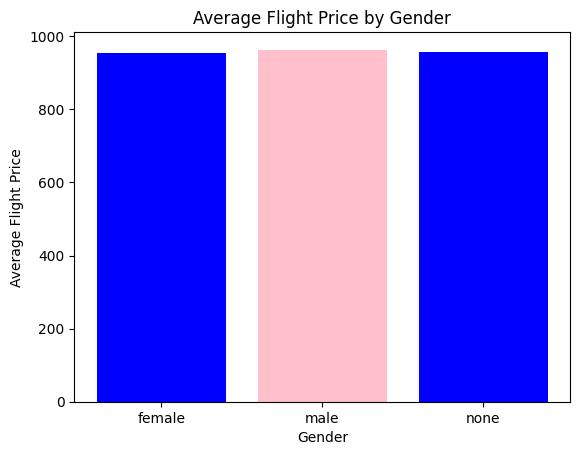

In [23]:
plt.bar(average_price.index, average_price.values, color=['blue', 'pink'])
plt.xlabel('Gender')
plt.ylabel('Average Flight Price')
plt.title('Average Flight Price by Gender')
plt.show()

### Histogram of Age

Text(0, 0.5, 'Frequency')

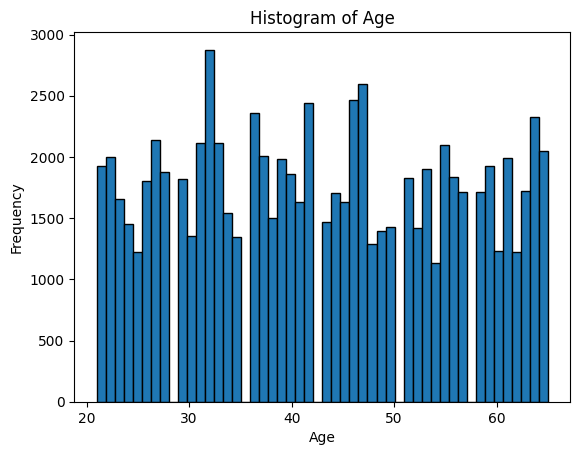

In [24]:
plt.hist(data=df_final,x='age',bins=50,edgecolor='black');
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

### Flight Distance vs. Flight Price

Text(0, 0.5, 'Flight Distance')

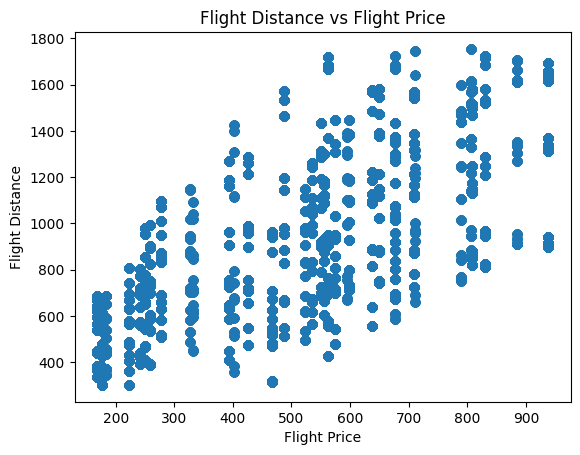

In [25]:
plt.scatter(df_final.flightDistance,df_final.flightPrice)
plt.title('Flight Distance vs Flight Price')
plt.xlabel('Flight Price')
plt.ylabel('Flight Distance')

### Flight Type vs. Average Flight Price

In [26]:
## first df_final.groupby('flightType') line of code will make a group by each gender
## then ['flightPrice'] after split into groups, this part of the code selects the ‘flightPrice’ column from each group
## then at the last .mean() function making mean value of each column


avg_flightType_Price=df_final.groupby('flightType')['flightPrice'].mean()

In [27]:
avg_flightType_Price

flightType
economic       660.901538
firstClass    1181.546355
premium        920.644034
Name: flightPrice, dtype: float64

Text(0, 0.5, 'Avg Flight Price')

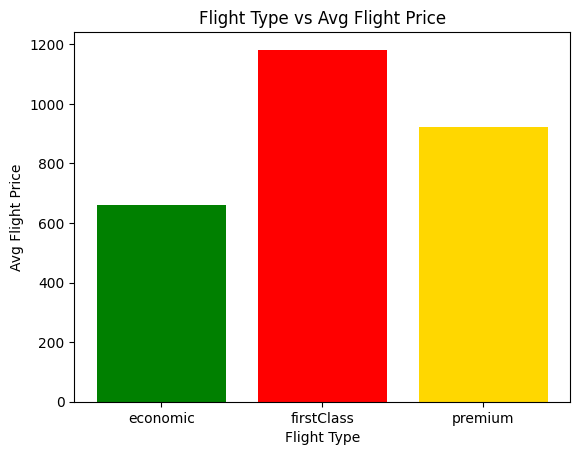

In [28]:
plt.bar(avg_flightType_Price.index,avg_flightType_Price.values,color=['Green','Red','Gold'])
plt.title('Flight Type vs Avg Flight Price')
plt.xlabel('Flight Type')
plt.ylabel('Avg Flight Price')

### Heatmap of Correlation between Numerical Variables

In [33]:
# Create a new DataFrame that only includes numerical columns
df_numerical = df_final.select_dtypes(include=[np.number])

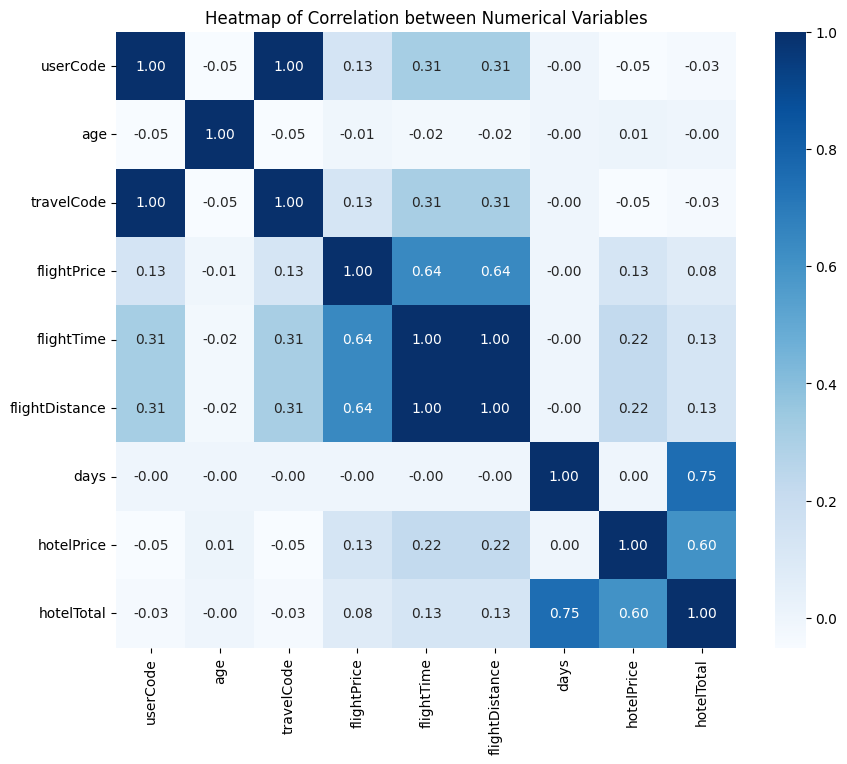

In [38]:
corr = df_numerical.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='Blues', cbar=True)
plt.title('Heatmap of Correlation between Numerical Variables')
plt.show()
